In [0]:
    %sh 
    pip install nltk
    pip install --upgrade pip
    python -m nltk.downloader all
    pip install wordcloud
    pip install mlflow

Requirement already satisfied: nltk in /databricks/python3/lib/python3.8/site-packages (3.6.2)
Requirement already satisfied: regex in /databricks/python3/lib/python3.8/site-packages (from nltk) (2021.4.4)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
Requirement already satisfied: tqdm in /databricks/python3/lib/python3.8/site-packages (from nltk) (4.60.0)
Requirement already satisfied: click in /databricks/python3/lib/python3.8/site-packages (from nltk) (7.1.2)
Requirement already satisfied: pip in /databricks/python3/lib/python3.8/site-packages (21.1)
/usr/local/lib/python3.8/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
 warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data] | 
[nltk_data] | Downloading package abc to /root/nltk_data...
[nltk_data] | Package abc is already up-to-date!
[nltk_data] | Downloading package alpino to /root/nltk_data...
[nltk_data] | Package alpino is already up-to-date!
[nltk_data] | Downloading package biocreative_ppi to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package biocreative_ppi is already up-to-date!
[nltk_data] | Downloading package brown to /root/nltk_data...
[nltk_data] | Package brown is already up-to-date!
[nltk_data] | Downloading package brown_tei to /root/nltk_data...
[nltk_data] | Package brown_tei is already up-to-date!
[nltk_data] | Downloading package cess_cat to /root/nltk_data...
[nltk_data] | Package cess_cat is already up-to-date!
[nltk_data] | Downloading package cess_esp to /root/nltk_data...
[nltk_data] | Package cess_esp is already up-to-date!
[nltk_data] | Downloading package chat80 to /root/nltk_data...
[nltk_data] | Package chat80 is already up-to-date!
[nltk_data] | Downloading package city_database to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package city_database is already up-to-date!
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Package cmudict is already up-to-date!
[nltk_data] | Downloading package comparative_sentences to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package comparative_sentences is already up-to-
[nltk_data] | date!
[nltk_data] | Downloading package comtrans to /root/nltk_data...
[nltk_data] | Package comtrans is already up-to-date!
[nltk_data] | Downloading package conll2000 to /root/nltk_data...
[nltk_data] | Package conll2000 is already up-to-date!
[nltk_data] | Downloading package conll2002 to /root/nltk_data...
[nltk_data] | Package conll2002 is already up-to-date!
[nltk_data] | Downloading package conll2007 to /root/nltk_data...
[nltk_data] | Package conll2007 is already up-to-date!
[nltk_data] | Downloading package crubadan to /root/nltk_data...
[nltk_data] | Package crubadan is already up-to-date!
[nltk_data] | Downloading package dependency_treebank to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package dependency_treebank is already up-to-date!
[nltk_data] | Downloading package dolch to /root/nltk_data...
[nltk_data] | Package dolch is already up-to-date!
[nltk_data] | Downloading package europarl_raw to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package europarl_raw is already up-to-date!
[nltk_data] | Downloading package floresta to /root/nltk_data...
[nltk_data] | Package floresta is already up-to-date!
[nltk_data] | Downloading package framenet_v15 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package framenet_v15 is already up-to-date!
[nltk_data] | Downloading package framenet_v17 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package framenet_v17 is already up-to-date!
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_data] | Package gazetteers is already up-to-date!
[nltk_data] | Downloading package genesis to /root/nltk_data...
[nltk_data] | Package genesis is already up-to-date!
[nltk_data] | Downloading package g

In [0]:
import pandas as pd
import numpy as np
import nltk
import itertools
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import PCA
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import mlflow
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from numpy import loadtxt

In [0]:
sp = (spark.read.option("header","true").csv("/FileStore/shared_uploads/ramtirtha.chaitanya@gmail.com/data.csv"))
df = sp.select("*").toPandas()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [0]:
display(df)
print(df.shape)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01T08:26:00.000+0000,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01T08:26:00.000+0000,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01T08:26:00.000+0000,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01T08:26:00.000+0000,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01T08:26:00.000+0000,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01T08:26:00.000+0000,7.65,17850,United Kingdom
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01T08:26:00.000+0000,4.25,17850,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,2010-12-01T08:28:00.000+0000,1.85,17850,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01T08:28:00.000+0000,1.85,17850,United Kingdom
536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01T08:34:00.000+0000,1.69,13047,United Kingdom


(541909, 8)

In [0]:
#InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
#StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
#Description: Product (item) name. Nominal.
#Quantity: The quantities of each product (item) per transaction. Numeric.
#InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
#UnitPrice: Unit price. Numeric, Product price per unit in sterling.
#CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
#Country: Country name. Nominal, the name of the country where each customer resides.

In [0]:
df_null_count = pd.DataFrame(df.isnull().sum())
df_null_percent = (df_null_count/df.shape[0])*100
display(df_null_count)
display(df_null_percent)

0
0
0
1454
0
0
0
135080
0


0
0.0
0.0
0.2683107311375157
0.0
0.0
0.0
24.926694334288598
0.0


In [0]:
#As we can see above, column 3(Description) and 7(CustomerID) has null values
#We can also see that the percentage of null values in those columns w.r.t no. of records in the column/feature.
#One thing that you will notice is that approximately 25% of records in feature 7 do not belong to any customer, so I delete it.

In [0]:
df.dropna(subset=['CustomerID'],inplace=True)
print(df.shape)
df_null_count = pd.DataFrame(df.isnull().sum())
display(df_null_count)

(406829, 8)

0
0
0
0
0
0
0
0
0


In [0]:
#So I eliminated the null values and now the revords are 406829.
#Now I will check for duplicates and eliminate them

In [0]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
#So there are 5225 duplicate entries, so I eliminate them.

5225

In [0]:
#Now we check the number of users and products and customers.

In [0]:
df_count = pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])
print(df_count)

products transactions customers
quantity 3684 22190 4372

In [0]:
#here customers are 4372 but transactions are 22190 , which means customers have bought or have done multiple transactions.

In [0]:
#no of transactions per customer
df_cust_transaction = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
products_per_transaction = df_cust_transaction.rename(columns = {'InvoiceDate':'Number of products'})
products_per_transaction[:10].sort_values('CustomerID')

Out[14]:

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24
5,12347,556201,18
6,12347,562032,22
7,12347,573511,47
8,12347,581180,11
9,12348,539318,17


In [0]:
#here if you notice entry 1 --> Invoiceno has c as preceding , it means the transaction is canceled.
#also we can notice some customers have ordered large no. of items per transaction.
#now let's take a deep dive into canceled orders.

In [0]:
products_per_transaction['orders canceled'] = products_per_transaction['InvoiceNo'].apply(lambda x:int('C' in x))
display(products_per_transaction[:5])

CustomerID,InvoiceNo,Number of products,orders canceled
12346,541431,1,0
12346,C541433,1,1
12347,537626,31,0
12347,542237,29,0
12347,549222,24,0


In [0]:
n1 = products_per_transaction['orders canceled'].sum()
n2 = products_per_transaction.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 3654/22190 (16.47%)

In [0]:
#no. of canceled orders are quite significant (~17%)
#we can't completely delete all of them, some of the data might be useful.

In [0]:
display(df.sort_values('CustomerID')[:5])

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18T10:01:00.000+0000,1.04,12346,United Kingdom
C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18T10:17:00.000+0000,1.04,12346,United Kingdom
562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02T08:48:00.000+0000,4.25,12347,Iceland
542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26T14:30:00.000+0000,0.55,12347,Iceland
537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07T14:57:00.000+0000,1.25,12347,Iceland


In [0]:
#here 2nd order is canceled.
#also , we can notice that the customer id and stockcode of entry 1 and 2 is same which indicates that once order was received , then the same item was placed for cancellation
#the only difference between entry 1 and 2 is the quantity and  invoicedate (also in invoice no. canceled orders are preceded by c)
#so now we need to check the data to check if this is consistent throughou the data

In [0]:
#check quantity for values < 0
df['Quantity'] = df['Quantity'].astype(int)
df1 = df[df['Quantity'] < 0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
for index, col in  df1.iterrows():
  if df[(['CustomerID'] == col[0]) & (df['Quantity'] == -col[1]) & (df['Description'] == col[2])].shape[0] == 0:
    print(df1.loc[index])
    break

CustomerID 14527
Quantity -1
StockCode D
Description Discount
UnitPrice 27.5
Name: 141, dtype: object

In [0]:
#here you can see , in stockcode there is D - discount
#so our hypothesis that for each canceled order , there must be a preceding order entry is wrong.
#lets check if there are other entries (while discarding discount entries)

In [0]:
df1 = df[(df['Quantity'] < 0) & (df['Description'] != 'Discount')][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
for index, col in  df1.iterrows():
  if df[(['CustomerID'] == col[0]) & (df['Quantity'] == -col[1]) & (df['Description'] == col[2])].shape[0] == 0:
    print(df1.loc[index])
    break

CustomerID 15311
Quantity -1
StockCode 35004C
Description SET OF 3 COLOURED FLYING DUCKS
UnitPrice 4.65
Name: 154, dtype: object

In [0]:
#here you can see this order is canceled , but there is no order beforehand, thats why our loop got broken.
# For the cancellations without preceding orders, a few of them are probably due to the fact that the buy orders were performed before December 2010 (the point of entry of the database).

In [0]:
df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                         (df['StockCode']  == col['StockCode']) & 
                         (df['InvoiceDate'] < col['InvoiceDate']) & 
                         (df['Quantity'] > 0)].copy()
    # Cancelation WITHOUT previous entry
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    # Cancelation WITH previous entries
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break

In [0]:
#In the above function, I checked the two cases:
#1)a cancel order exists without counterpart
#2)there's at least one counterpart with the exact same quantity
#for ml line 44

In [0]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))
df_cleaned['Quantity'] = df_cleaned['Quantity'].astype(int)
display(df_cleaned.sort_values('CustomerID')[:5])
df_cleaned_copy = df_cleaned.copy(deep = True)

entry_to_remove: 7521
doubtfull_entry: 1226

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18T10:01:00.000+0000,1.04,12346,United Kingdom,74215
C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18T10:17:00.000+0000,1.04,12346,United Kingdom,0
562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02T08:48:00.000+0000,4.25,12347,Iceland,0
542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26T14:30:00.000+0000,0.55,12347,Iceland,0
537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07T14:57:00.000+0000,1.25,12347,Iceland,0


In [0]:
dtype = df_cleaned.dtypes
df_cleaned['UnitPrice'] = df_cleaned['UnitPrice'].astype(float)
print(dtype)
display(df_cleaned.sort_values('CustomerID')[:5])

InvoiceNo object
StockCode object
Description object
Quantity int64
InvoiceDate datetime64[ns]
UnitPrice object
CustomerID object
Country object
QuantityCanceled int64
dtype: object

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18T10:01:00.000+0000,1.04,12346,United Kingdom,74215
C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18T10:17:00.000+0000,1.04,12346,United Kingdom,0
562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02T08:48:00.000+0000,4.25,12347,Iceland,0
542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26T14:30:00.000+0000,0.55,12347,Iceland,0
537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07T14:57:00.000+0000,1.25,12347,Iceland,0


In [0]:
#now we check the number of entries that correspond to cancellations and that have not been deleted in the previous code

In [0]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("no. of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

no. of entries to delete: 48
Out[30]:

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,0


In [0]:
#now that the data of canceled orders is cleaned, lets check total price of every purchase

In [0]:
#df_cleaned['UnitPrice'] = df_cleaned['UnitPrice'].astype(float)
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID')[:5]

Out[32]:

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,74215,0.0
148288,549222,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-04-07 10:43:00,4.25,12347,Iceland,0,17.0
428971,573511,22698,PINK REGENCY TEACUP AND SAUCER,12,2011-10-31 12:25:00,2.95,12347,Iceland,0,35.4
428970,573511,47559B,TEA TIME OVEN GLOVE,10,2011-10-31 12:25:00,1.25,12347,Iceland,0,12.5
428969,573511,47567B,TEA TIME KITCHEN APRON,6,2011-10-31 12:25:00,5.95,12347,Iceland,0,35.7


In [0]:
#Each entry of the dataframe indicates prices for a single kind of product
#Now we need to calculate total price per order.

In [0]:
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]

Out[34]:

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,2011-08-02 08:48:00.000000000
6,12347,573511,1294.32,2011-10-31 12:25:00.000001280


In [0]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, column = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[column]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("No of keywords in variable '{}': {}".format(column,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [0]:
#This function takes as input the dataframe and analyzes the content of the Description column by performing the following operations:
    #extract the names (proper, common) appearing in the products description
    #for each name,we extract the root of the word and aggregate the set of names associated with this particular root
    #count the number of times each root appears in the dataframe
    #when several words are listed for the same root, we consider that the keyword associated with this root is the shortest name (this systematically selects the singular when there are singular/plural variants)


In [0]:
#list of products
df_products = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})

In [0]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)
#keywords: the list of extracted keywords
#keywords_roots: a dictionary where the keys are the keywords roots and the values are the lists of words associated with those roots
#count_keywords: dictionary listing the number of times every word is used
#no of keywords which are ~1400

No of keywords in variable 'Description': 1483

In [0]:
#here in count_keywords is a dictionary in function, therefore lets convert it into a list of products

In [0]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

In [0]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)
print(liste[:10])

[['heart', 267], ['vintage', 211], ['set', 206], ['pink', 189], ['bag', 165], ['box', 155], ['glass', 149], ['christmas', 137], ['design', 128], ['candle', 121]]

In [0]:
#the list liste contains more than 1400 keywords and some of them are repeating
#some names from the list are useless(they dont contain relevant information for eg: colours)
#Therefore, we discard these words and consider only the words that appear more than 13 times.

In [0]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
    
list_products.sort(key = lambda x:x[1], reverse = True)
print(len(list_products))

193

In [0]:
#After cleaning the useless words, the words which are useful and remaining are 193.

In [0]:
liste_products = df_cleaned['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_products))

In [0]:
#Now , a matrix X is created where we have to create groups of products bases on description
# we find that introducing the price range results in more balanced groups in terms of element numbers. Hence, we add 6 extra columns to this matrix, where we indicate the price range of the products

In [0]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_products):
    prix = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

In [0]:
print("{:<8} {:<20} \n".format('range', 'no. products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

range no. products 
--------------------
0<.<1 964 
1<.<2 1009 
2<.<3 673 
3<.<5 606 
5<.<10 470 
.>10 156

In [0]:
#We can see no. of products in different price ranges.
#Now we have to group products based into different classes.
#In order to group them , we need to use k-means clustering method(Ideally , we should use k-modes(hamming distance) in this case but I will have to research a little bit about it before using it, since I have experience on handling k-means I'm using k-means(euclidean distance) here.)

In [0]:
matrix = X.to_numpy()
for n_clusters in range(3,10):
  kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state = 0)
  kmeans.fit(matrix)
  clusters = kmeans.predict(matrix)
  silhouette_avg = silhouette_score(matrix, clusters)
  print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
  

For n_clusters = 3 The average silhouette_score is : 0.10158702596012364
For n_clusters = 4 The average silhouette_score is : 0.1254012355825036
For n_clusters = 5 The average silhouette_score is : 0.14740815062347604
For n_clusters = 6 The average silhouette_score is : 0.15178583093350095
For n_clusters = 7 The average silhouette_score is : 0.14215594475658525
For n_clusters = 8 The average silhouette_score is : 0.14478971197006033
For n_clusters = 9 The average silhouette_score is : 0.14745560804129823

In [0]:
#on different runs i was getting different silhoutte score, so i fixed the random state to an arbitrary no.(during production level deployment , remove random_state)
#n_init = max no of iterations , n_clusters = range of cluster , k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
# We created matrix/numpy array because kmeans performs better or requires array or matrices (according to docs : X{array-like, sparse matrix} of shape (n_samples, n_features), y not required
# i tried converting X.as_matrix() but it is depreciated so I will put the data to fit in kmeans as numpy array(hence accuracy levels might differ)

In [0]:
#about silhouette score:
#Compute the mean Silhouette Coefficient of all samples.
#The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
#hence (b-a)/max(a,b)
#To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.
#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [0]:
#n practice, the scores obtained above can be considered equivalent since, depending on the run, scores of 0.1±0.05 will be obtained for all clusters with n_clusters > 3 (we obtain slightly lower scores for the first cluster). On the other hand, I found that beyond 5 clusters, some clusters contained very few elements. I therefore choose to separate the dataset into 5 clusters
# we can obesrve from above samples, the best possible slihoutte score is ~0.15

In [0]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.14740815062347604

In [0]:
# we can also use kmodes like :
#km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
#clusters = km.fit_predict(matrix)
#silhouette_avg = silhouette_score(matrix, clusters)

In [0]:
pd.Series(clusters).value_counts()

Out[56]: 0 1009
3 964
4 673
2 626
1 606
dtype: int64

In [0]:
#graph needs to presented for given data.

In [0]:
liste = pd.DataFrame(liste_products)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

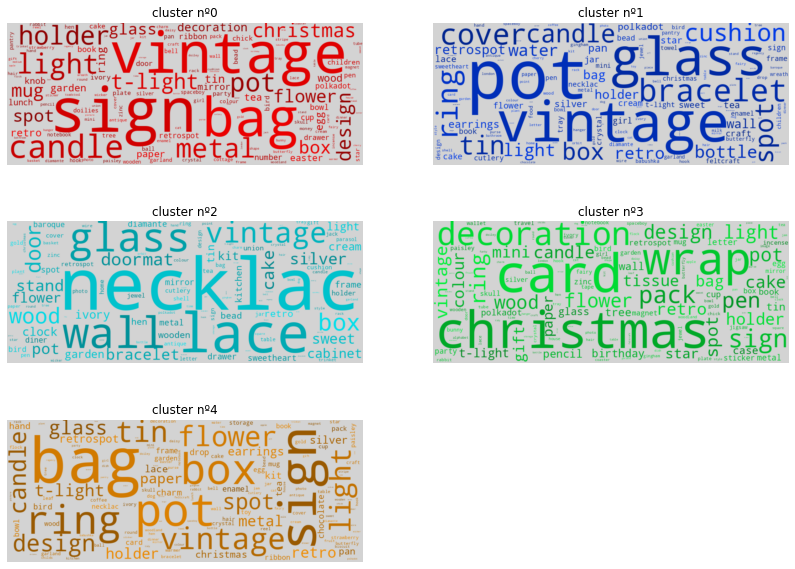

In [0]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________________________
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    #________________________________________________________
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))
#________________________________________________________________________
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)

In [0]:
#From this representation, we can see that for example, one of the clusters contains objects that could be associated with gifts (keywords: Christmas, packaging, card, ...). Another cluster would rather contain luxury items and jewelry (keywords: necklace, bracelet, lace, silver, ...). 
#Nevertheless, it can also be observed that many words appear in various clusters and it is therefore difficult to clearly distinguish them.

In [0]:
#n order to ensure that these clusters are truly distinct, I look at their composition. Given the large number of variables of the initial matrix, I first perform a PCA

In [0]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

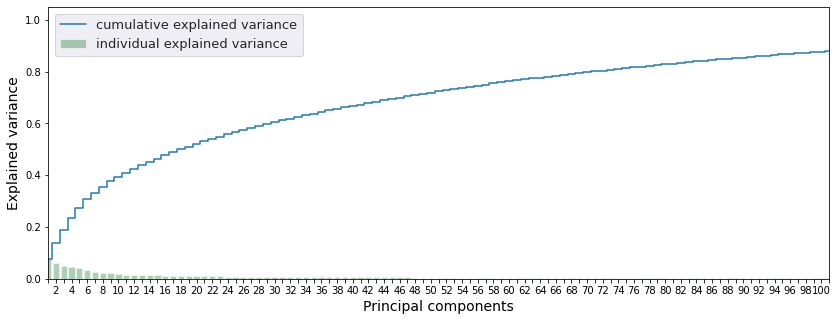

In [0]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

In [0]:
#The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting.
#variance is the expectation of the squared deviation of a random variable from its mean. In other words, it measures how far a set of numbers is spread out from their average value.
#as we can see from the graph, we need more than 100 components to explain 90% of the variance of the data.


In [0]:
#In the previous section, the different products were grouped in five clusters. In order to prepare the rest of the analysis, I need to add a column to existing dataframe consisting of the five clusters under name categ_product. 

In [0]:
corresp = dict()
for key, val in zip (liste_products, clusters):
    corresp[key] = val 
df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)

In [0]:
#now since we have got categ_product , we need add 4 columns categ_0, categ_1, categ_2, categ_3, categ_4 which depicts the amount spent on the each product of the cluster.

In [0]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)
df_cleaned[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]

Out[68]:

,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,4,0.0,0.00,0.0,0.0,15.3
1,536365,WHITE METAL LANTERN,1,0.0,20.34,0.0,0.0,0.0
2,536365,CREAM CUPID HEARTS COAT HANGER,1,0.0,22.00,0.0,0.0,0.0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,1,0.0,20.34,0.0,0.0,0.0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,1,0.0,20.34,0.0,0.0,0.0


In [0]:
#total price of order of customer.
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})

#percentage of order price / product category
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp

#adding date of order to dataframe
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

#adding basket price to dataframe 
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]


Out[69]:

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
1,12347,537626,711.79,187.2,293.35,124.44,23.40,83.40,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,130.5,169.20,38.25,84.34,53.10,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,330.9,115.00,38.25,81.00,71.10,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,74.4,168.76,19.90,41.40,78.06,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,109.7,158.16,136.05,61.30,119.70,2011-08-02 08:48:00.000000000


In [0]:
#The dataframe basket_price contains information for a period of 12 months. 
#Later, one of the objectives will be to develop a model capable of characterizing and anticipating the habits of the customers visiting the site .
#In order to be able to test the model in a realistic way, I split the data set by retaining the first 10 months to develop the model and the following two months to test it.

In [0]:
#I'll see range of dates

In [0]:
print(basket_price['InvoiceDate'].min(), '------>', basket_price['InvoiceDate'].max())

2010-12-01 08:26:00 ------> 2011-12-09 12:50:00

In [0]:
basket_price['InvoiceDate'] = pd.to_datetime(basket_price["InvoiceDate"]).dt.date
type(basket_price["InvoiceDate"])

Out[73]: pandas.core.series.Series

In [0]:
set_train = basket_price[basket_price['InvoiceDate'] < datetime.date(2011,10,1)]
set_test = basket_price[basket_price['InvoiceDate'] >= datetime.date(2011,10,1)]
basket_price = set_train.copy(deep = True)

In [0]:
#Now I group together the different entries that correspond to the same user. 
#I thus determine the number of purchases made by the user, as well as the minimum, maximum, average amounts and the total amount spent during all the visits

In [0]:
#number of visits and stats on the amount of the basket per users
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() / transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]


Out[76]:

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347,5,382.52,711.79,558.172000,2790.86,29.836681,32.408290,12.787815,10.442659,14.524555
1,12348,4,227.44,892.80,449.310000,1797.24,41.953217,0.000000,20.030714,38.016069,0.000000
2,12350,1,334.40,334.40,334.400000,334.40,48.444976,0.000000,11.961722,11.692584,27.900718
3,12352,6,144.35,840.30,345.663333,2073.98,12.892120,15.711338,67.534402,0.491808,3.370331
4,12353,1,89.00,89.00,89.000000,89.00,13.033708,0.000000,67.078652,0.000000,19.887640


In [0]:
#Finally, I define two additional variables that give the number of days elapsed since the first purchase ( FirstPurchase ) and the number of days since the last purchase ( LastPurchase )

In [0]:
last_date = basket_price['InvoiceDate'].max()
first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x).days)
test2 = last_purchase.applymap(lambda x:(last_date - x).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

Out[78]:

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12347,5,382.52,711.79,558.172000,2790.86,29.836681,32.408290,12.787815,10.442659,14.524555,59,297
1,12348,4,227.44,892.80,449.310000,1797.24,41.953217,0.000000,20.030714,38.016069,0.000000,5,288
2,12350,1,334.40,334.40,334.400000,334.40,48.444976,0.000000,11.961722,11.692584,27.900718,240,240
3,12352,6,144.35,840.30,345.663333,2073.98,12.892120,15.711338,67.534402,0.491808,3.370331,2,226
4,12353,1,89.00,89.00,89.000000,89.00,13.033708,0.000000,67.078652,0.000000,19.887640,134,134


In [0]:
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print("no. of customers with a single purchase: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

no. of customers with a single purchase: 1445/3608 (40.05%)

In [0]:
#A customer category of particular interest is that of customers who make only one purchase. One of the objectives may be, for example, to target these customers in order to retain them. In part, I find that this type of customer represents 40% which is about 1/3 of the customers listed

In [0]:
#Now we need to encode the data
#Each entry in datafarame transactions_per_user corresponds to a particular client. 
#I use this information to characterize the different types of customers and only keep a subset of variables

In [0]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols].to_numpy()

In [0]:
#The different variables I selected have quite different ranges of variation and before continuing the analysis, I create matrix so that the data is standardized.

In [0]:
#now in the matrix , the data has different scales.
#So I use standard scaler so that the entire matrix is under one scale.


In [0]:
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [ 3.62305987 259.93189634 556.26687999 377.06036244 25.22916919
 16.37327913 23.21847344 13.98907929 21.19884856]

In [0]:
#In the following, I will create clusters of customers. 
#In practice, before creating these clusters, it is interesting to define a base of smaller dimension allowing to describe the scaled_matrix matrix. #In this case, I will use this base in order to create a representation of the different clusters and thus verify the quality of the separation of the different groups. 
#I therefore perform a PCA.

In [0]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

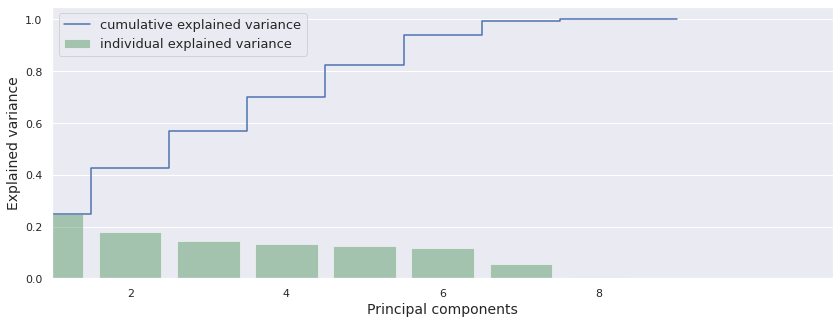

In [0]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

In [0]:
#Like how I applied pca earlier and display variance, I do the same here.
#Similarly, now I apply kmeans and compute silhouette score once again , this time on scaled_matrix.

In [0]:
n_clusters = 11
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100, random_state=0)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('silhouette score: {:<.3f}'.format(silhouette_avg))

silhouette score: 0.216

In [0]:
#I observe the maximum score is obtained at 11 clusters, so I fix n_clusters

In [0]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['no. of customers per cluster']).T

Out[92]:

,1,0,5,2,10,7,4,6,8,9,3
no. of customers per cluster,1448,507,457,311,295,229,183,153,9,8,8


In [0]:
#There is a certain disparity in the sizes of different groups that have been created. Hence I will now try to understand the content of these clusters in order to validate (or not) this particular separation.

In [0]:
pca = PCA(n_components=6,random_state=0)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

<command-2337336945973345>:38: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
 plt.tight_layout()

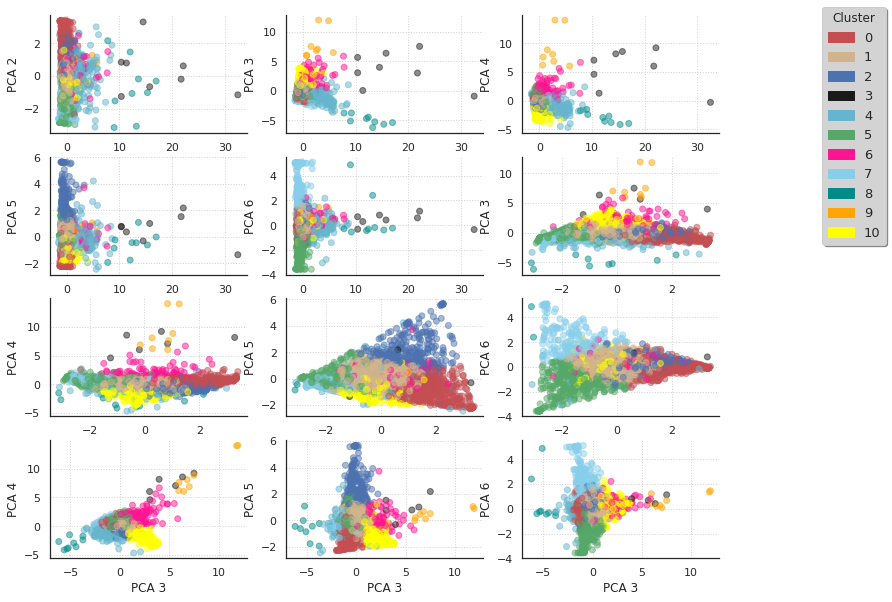

In [0]:


import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()



In [0]:
#From this representation, it can be seen, for example, that the second principal component(PCA1 is not visible because graph cannot shrink enough) allow to separate the tiniest clusters from the rest. More generally, we see that there is always a representation in which two clusters will appear to be distinct.

In [0]:
import matplotlib as mpl
import matplotlib.cm as cm

def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  



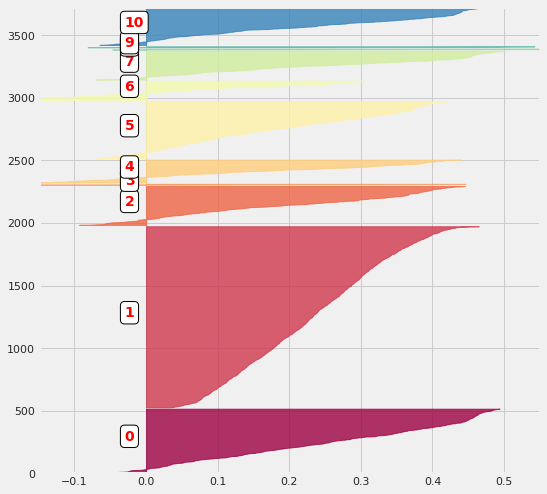

In [0]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

In [0]:
#At this stage, I have verified that the different clusters are indeed disjoint (at least, in a global way, since the graphs of individual clusters rarely intersect). 
#It remains to understand the habits of the customers in each cluster. To do so, I start by adding to the selected_customers dataframe a variable that defines the cluster to which each client belong.

In [0]:
selected_customers.loc[:, 'cluster'] = clusters_clients
selected_customers[:5]

Out[100]:

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,cluster
0,12347,5,382.52,711.79,558.172000,2790.86,29.836681,32.408290,12.787815,10.442659,14.524555,59,297,1
1,12348,4,227.44,892.80,449.310000,1797.24,41.953217,0.000000,20.030714,38.016069,0.000000,5,288,5
2,12350,1,334.40,334.40,334.400000,334.40,48.444976,0.000000,11.961722,11.692584,27.900718,240,240,5
3,12352,6,144.35,840.30,345.663333,2073.98,12.892120,15.711338,67.534402,0.491808,3.370331,2,226,0
4,12353,1,89.00,89.00,89.000000,89.00,13.033708,0.000000,67.078652,0.000000,19.887640,134,134,0


In [0]:
#Then, I average the contents of this dataframe by first selecting the different groups of clients. 
#This gives access to, for example, the average baskets price, the number of visits or the total sums spent by the clients of the different clusters. #I also determine the number of clients in each group (variable size )

In [0]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('no. of customers:', merged_df['size'].sum())
merged_df = merged_df.sort_values('sum')

no. of customers: 3608

In [0]:
#number of customers in each group is around 3608
#Finally, I re-organize the cluster of customers added to the dataframe by ordering the different clusters: first, in relation to the amount spent in each product category and then, according to the total amount spent

In [0]:
liste_index = []
for i in range(5):
    column = 'categ_{}'.format(i)
    liste_index.append(merged_df[merged_df[column] > 45].index.values[0])
liste_index_reordered = liste_index
liste_index_reordered += [ s for s in merged_df.index if s not in liste_index]
merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
display(merged_df[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4', 'size']])

cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,size
5.0,2.439824945295405,214.18490153172866,328.57378774617064,267.83176956909887,669.1423654266958,57.33448571609049,7.654638775240373,9.46750324748546,12.797868747005364,12.748760797641808,457
2.0,2.122186495176849,208.251768488746,338.94501607717046,267.59463744008764,654.6803536977492,13.404912575679313,50.24271682776717,16.042909589849085,6.318194255582583,14.041071301435219,311
0.0,2.6173570019723864,199.3744792899408,345.5655424063116,262.177734079311,711.4115207100592,11.154825130746266,10.807819813684388,62.3418152500473,4.810607824721483,10.896061845369754,507
7.0,2.1703056768558953,193.1570305676856,314.57720524017464,245.21583830664727,574.2755895196507,17.97579422828136,6.026724610390352,7.261013378691061,57.755390413460795,10.98107736917644,229
10.0,2.593220338983051,205.14786440677963,370.27342372881355,283.5126267192318,808.3056949152542,14.997906435360882,7.156522857003407,10.31264430178409,6.934724147063762,60.59820225878786,295
1.0,3.264502762430939,220.48210704419887,460.97032527624316,332.2407085039922,1091.0104081491713,25.869145965671805,17.272448202229207,20.6251091010739,14.144180663388523,22.09320919235477,1448
4.0,1.7377049180327868,1078.9965027322403,1464.8451967213116,1252.4127906583399,2333.2165628415305,25.982917198103866,16.929936403630386,23.275724054618767,11.983077210494175,21.828713967076357,183
8.0,1.2222222222222223,3901.461111111112,4064.0988888888896,3982.7800000000007,5032.047777777779,20.38812652790056,14.531229017146432,26.857929266161047,26.370713064760594,11.852002124031348,9
6.0,18.0718954248366,86.67594771241829,1643.3341176470587,580.3284013963045,9921.328954248367,23.97683455778254,16.22349162647422,22.102441847153635,12.30306246020039,25.414649679475676,153
9.0,87.125,20.862499999999997,2643.8125,456.5266892715659,37313.235,25.165035040350027,13.979828501308754,24.794941520106107,11.477885104631184,24.60492916804229,8


In [0]:
#This is class of radar plot which is taken from google
#This allows to have a global view of the content of each cluster
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

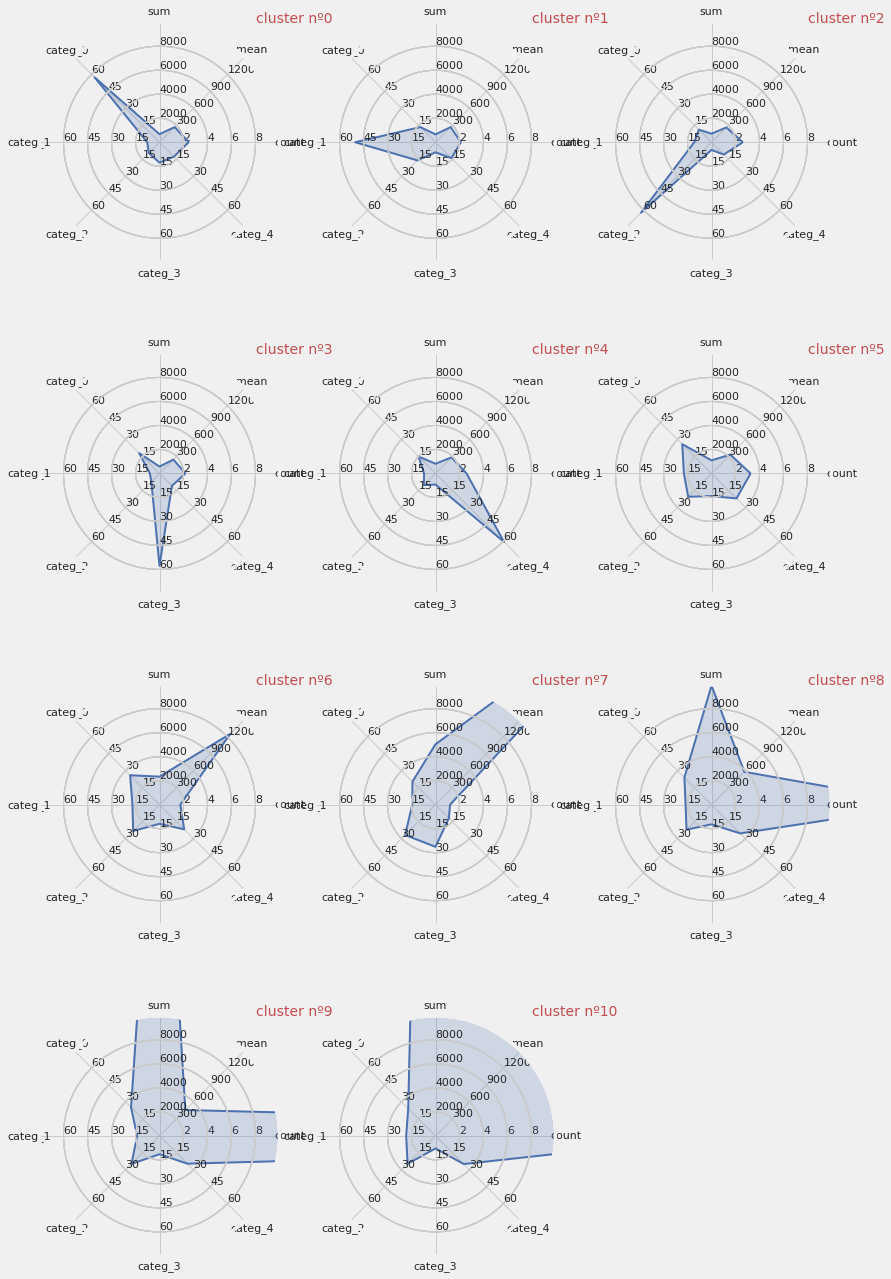

In [0]:
fig = plt.figure(figsize=(10,12))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1 

In [0]:
#It can be seen, for example, that the first 5 clusters correspond to a strong preponderance of purchases in a particular category of products. Other clusters will differ from basket averages ( mean ), the total sum spent by the clients ( sum ) or the total number of visits made ( count ).

In [0]:
#Now I do Classification of customers, using several classifiers from scikit learn.
#in order to simplify their use, I define a class that allows to interface several of the functionalities common to these different classifiers.

In [0]:
#As I'm going to fit multiple models and compare amongst them , I think it's better to create a class which contains commmon parameters and then just fit and predict the model on grid search using kfold. K fold is used to have 100% data involvement during training.
#all i've to do is put selected algorithm in clf and put training and testing data.
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, X):
        return self.clf.predict(X)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Accuracy: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))

In [0]:
#Since the goal is to define the class to which a client belongs and this, as soon as its first visit, I only keep the variables that describe the content of the basket, and do not take into account the variables related to the frequency of visits or variations of the basket price over time.(Those variables will be used in predictions over time(time series algorithms like ARIMA), right now we are aiming for customer classification).

In [0]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

In [0]:
#Now I will split the data using train test split (80 - 20 )

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8)

In [0]:
#Now I apply svc using grid search.

In [0]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

In [0]:
svc.grid_fit(X_train, y_train)

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 warnings.warn("Liblinear failed to converge, increase "
/databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear 

In [0]:
y_pred_svc = svc.grid_predict(X_test, y_test)

Accuracy: 85.87 %

In [0]:
#So , the accuracy of svc classifier is ~85% , but if I remember correctly, earlier we have observed that roughly 40% of customers are occupied by one class causing imbalance in size of classes(we had 11 classes after KMeans).
#It is therefore interesting to look at how the predictions and real values compare to the different classes.
#Hence confusion matrix is needed to be printed in order to check whether our prediction results are acccurate

In [0]:
print(confusion_matrix(y_test, svc.predictions))

[[ 87 2 0 0 0 0 0 0 0 0 0]
 [ 1 299 0 0 0 0 0 0 0 0 2]
 [ 0 6 51 0 0 0 0 0 0 0 0]
 [ 0 1 0 0 0 0 0 0 0 0 0]
 [ 0 38 1 0 0 0 0 0 0 0 0]
 [ 0 19 0 0 0 67 0 0 0 0 0]
 [ 2 27 0 0 0 1 0 0 0 0 3]
 [ 0 10 0 0 0 0 0 48 0 0 0]
 [ 0 1 0 0 0 0 0 0 0 0 0]
 [ 0 4 0 0 0 0 0 0 0 0 0]
 [ 0 1 0 0 0 0 0 0 0 0 51]]

In [0]:
#Now we can see that in one particular class the amount of predictions are quite a lot(each column is predicted value class, each row is actual value class)(y_pred vs y_actual).

In [0]:
#A typical way to test the quality of a fit is to draw a learning curve. In particular, this type of curves allow to detect possible drawbacks in the model, linked for example to over- or under-fitting. This also shows to which extent the mode could benefit from a larger data sample. 
#code is taken from sklearn docs on learning curve

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

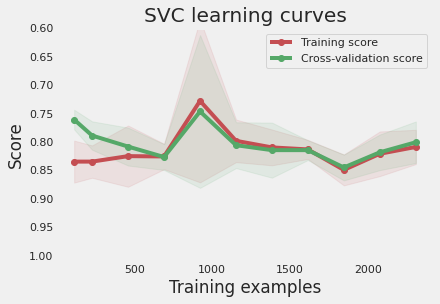

In [0]:
g = plot_learning_curve(svc.grid.best_estimator_, "SVC learning curves", X_train, y_train, ylim = [1.01, 0.6], cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [0]:
#we can see from the graph , that as training samples increase, the variance(gap between two graphs) decreases.
#Now , ideally a good fit model should have a bias-variance trade off.
# Since the variance decreases we can see overfitting doesn't occur.
#Also, we can see that the accuracy of the training curve is correct(roughly around testing accuracy) which is synonymous of a low bias.
#Hence the model does not underfit the data.
#also we can see that gap between the graphs decrease over time which shows that there is bias-variance tradeoff

In [0]:
lr = Class_Fit(clf = LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)

In [0]:
lr.grid_fit(X_train, y_train)

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"
/databricks/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 n_iter_i = _check_optimize_result(
/databricks/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 n_iter_i = _check_optimize_result(
/databricks/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 n_iter_i = _check_optimize_result(
/databricks/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 n_iter_i = _check_optimize_result(
/databricks/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 n_iter_i = _check_optimize_result(
/databricks/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 n_iter_i = _check_optimize_result(
/databricks/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 n_iter_i = _check_optimize_result(
/databricks/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED 

In [0]:
lr.grid_predict(X_test,y_test)

Accuracy: 91.00 %

In [0]:
#so , logistic regression gives better accuracy compared to svc.
#as I did in svc , I need to plot learning curve using the class in order to verify that there is correct bias-variance tradeoff

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

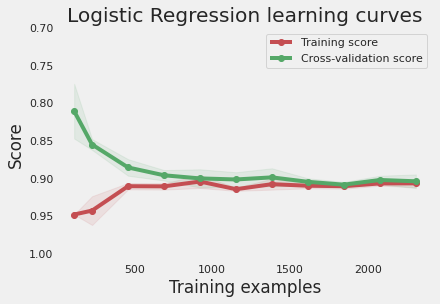

In [0]:
g = plot_learning_curve(lr.grid.best_estimator_, "Logistic Regression learning curves", X_train, y_train, ylim = [1.01, 0.7], cv = 5, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [0]:
#we can see from the graph , that as training samples increase, the variance(gap between two graphs) decreases.(although initially gap is huge , later on as our model start training the accuracy improves.)
#Now , ideally a good fit model should have a bias-variance trade off.
# Since the variance decreases we can see overfitting doesn't occur.
#Also, we can see that the accuracy of the training curve is correct(roughly around testing accuracy) which is synonymous of a low bias.
#Hence the model does not underfit the data.
#also we can see that gap between the graphs decrease over time which shows that there is bias-variance tradeoff

In [0]:
knn = Class_Fit(clf = KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors':np.arange(1,50,1)}], Kfold = 5)

In [0]:
knn.grid_fit(X_train, y_train)

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

In [0]:
knn.grid_predict(X_test, y_test)

Accuracy: 79.22 %

In [0]:
print(knn.grid.best_estimator_)

KNeighborsClassifier(n_neighbors=3)

In [0]:
#as we can observe , the accuracy decreases when with apply knn , so it might not be our best model..
#the best k from range 1 - 50 with step size of 1, is 3

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

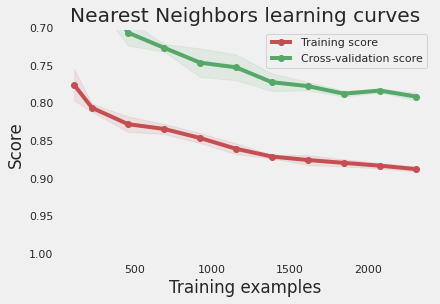

In [0]:
g = plot_learning_curve(knn.grid.best_estimator_, "Nearest Neighbors learning curves", X_train, y_train, ylim = [1.01, 0.7], cv = 5, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [0]:
#there is high bias is data , considering the gap between training and cross_val score

In [0]:
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)

In [0]:
#hyperparameters info
#The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain
#The number of features to consider when looking for the best split:
  #If int, then consider max_features features at each split.
  #If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
  #If “auto”, then max_features=sqrt(n_features).
  #If “sqrt”, then max_features=sqrt(n_features).
  #If “log2”, then max_features=log2(n_features).
  #If None, then max_features=n_features.

In [0]:
tr.grid_fit(X_train, y_train)

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

In [0]:
tr.grid_predict(X_test, y_test)

Accuracy: 83.66 %

In [0]:
#If required I can calculate roc_auc score as well.

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

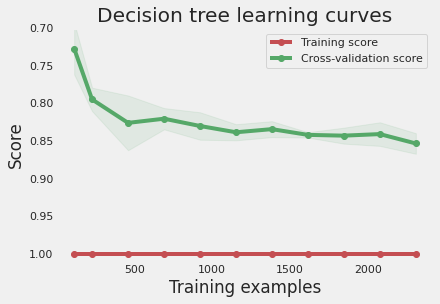

In [0]:
g = plot_learning_curve(tr.grid.best_estimator_, "Decision tree learning curves", X_train, y_train, ylim = [1.01, 0.7], cv = 5, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [0]:
#the training accuracy is always 100% in decision tree.
#the cross val graph proves that our model is good fit since accuracy keeps on increasing as sample increase.

In [0]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],'max_features' :['sqrt', 'log2']}#dictionary of parameters.
rf.grid_search(parameters = param_grid, Kfold = 5)


In [0]:
rf.grid_fit(X_train, y_train)

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

In [0]:
rf.grid_predict(X_test, y_test)

Accuracy: 89.47 %

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

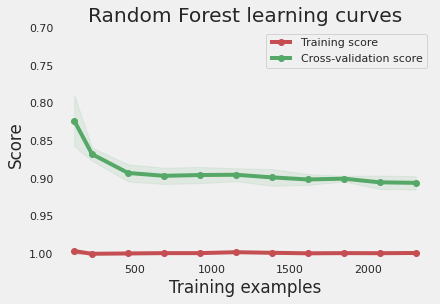

In [0]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, y_train, ylim = [1.01, 0.7], cv = 5, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [0]:
#similar to decision tree , the training accuracy will always be 100% , but again the model is good fit because accuracy is touching 90%
#in order to verify that overfitting doesnt occur, I plot learning curve.
#we can see that the bias-variance trade off is achieved and this model is best fit so far.

In [0]:
ada = Class_Fit(clf = AdaBoostClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada.grid_search(parameters = param_grid, Kfold = 5)

In [0]:
ada.grid_fit(X_train, y_train)

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

In [0]:
ada.grid_predict(X_test, y_test)

Accuracy: 54.02 %

In [0]:
#ada boost has worst accuracy amongst all models.

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

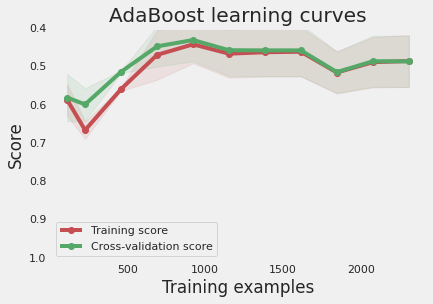

In [0]:
g = plot_learning_curve(ada.grid.best_estimator_, "AdaBoost learning curves", X_train, y_train, ylim = [1.01, 0.4], cv = 5, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [0]:
gb = Class_Fit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)

In [0]:
gb.grid_fit(X_train,y_train)

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

In [0]:
gb.grid_predict(X_test, y_test)

Accuracy: 89.20 %

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

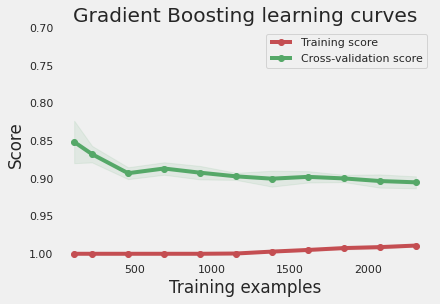

In [0]:
g = plot_learning_curve(gb.grid.best_estimator_, "Gradient Boosting learning curves", X_train, y_train, ylim = [1.01, 0.7], cv = 5, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [0]:
gnb = Class_Fit(clf = GaussianNB)
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb.grid_search(parameters = param_grid, Kfold = 5)

In [0]:
gnb.grid_fit(X_train, y_train)

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

In [0]:
gnb.grid_predict(X_test, y_test)

Accuracy: 87.40 %

/databricks/python/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
 warnings.warn(("The least populated class in y has only %d"

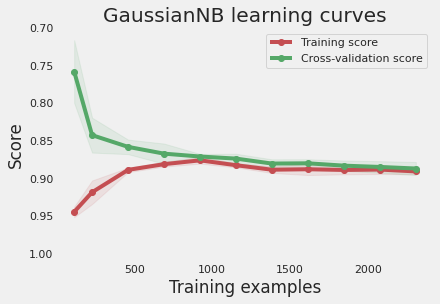

In [0]:
g = plot_learning_curve(gnb.grid.best_estimator_, "GaussianNB learning curves", X_train, y_train, ylim = [1.01, 0.7], cv = 5, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [0]:
#The results of the different classifiers presented in the previous sections can be combined to improve the classification model.
#This can be achieved by selecting the customer category as the one indicated by the majority of classifiers. 
#To do this, I use the VotingClassifier method of the sklearn package.
#In order to do that I need to select the best params of all models.

In [0]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)
gnb_best = GaussianNB(**gnb.grid.best_params_)

In [0]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best), ('gb', gb_best), ('tree', tr_best), ('knn', knn_best) ,('lr', lr_best),('gnb', gnb_best) ], voting='soft')

In [0]:
votingC = votingC.fit(X_train, y_train)

/databricks/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 n_iter_i = _check_optimize_result(

In [0]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(y_test, predictions)))

Precision: 90.03 %

In [0]:
#I have excluded linearsvc because:
# it doesn't have predict_proba parameter which is required to evaluate svc in voting classifier.

In [0]:
#Until this point, the whole analysis was based on the data of the first 10 months. 
#In this section, I test the model the last two months of the dataset, that has been stored in the set_test dataframe.(Lets test this model on unknown data.)

In [0]:
basket_price = set_test.copy(deep = True)

In [0]:
#I need to reformat this data according to the same procedure as used on the training set. 
#However, I am correcting the data to take into account the difference in time between the two datasets and weights the variables count and sum to obtain an equivalence with the training set

In [0]:
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()

#correcting time range
transactions_per_user['count'] = 5 * transactions_per_user['count']
transactions_per_user['sum']   = transactions_per_user['count'] * transactions_per_user['mean']

transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

Out[251]:

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347,10,224.82,1294.32,759.57,7595.70,20.017905,24.271627,10.670511,12.696657,32.343299
1,12349,5,1757.55,1757.55,1757.55,8787.75,26.506216,10.713778,46.021450,4.513101,12.245455
2,12352,5,311.73,311.73,311.73,1558.65,34.420813,7.217785,42.953838,6.672441,8.735123
3,12356,5,58.35,58.35,58.35,291.75,0.000000,0.000000,100.000000,0.000000,0.000000
4,12357,5,6207.67,6207.67,6207.67,31038.35,18.475531,28.350089,33.399810,5.089832,14.684737


In [0]:
#I added parameters like they were added in training data for model building

In [0]:
#Then, I convert the dataframe into a matrix and retain only variables that define the category to which consumers belong.(normalization)

In [0]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
#_____________________________________________________________
matrix_test = transactions_per_user[list_cols].to_numpy()
scaled_test_matrix = scaler.transform(matrix_test)

In [0]:
#Each line in this matrix contains a consumer's buying habits. At this stage, it is a question of using these habits in order to define the category to which the consumer belongs. These categories have been established by clusters from 1st stage of KMeans. At this stage, it is important to bear in mind that this step does not correspond to the classification stage itself. Here, we prepare the test data by defining the category to which the customers belong. However, this definition uses data obtained over a period of 2 months (via the variables count , min , max and sum ). The classifier(got by voting classifier) uses a more restricted set of variables that will be defined from the first purchase of a client.

#Here it is a question of using the available data over a period of two months and using this data to define the category to which the customers belong. Then, the classifier can be tested by comparing its predictions with these categories. In order to define the category to which the clients belong, I recall the instance of the kmeans method earlier. The predict method of this instance calculates the distance of the consumers from the centroids of the 11 client classes(got through 2nd round of KMeans) and the smallest distance will define the belonging to the different categories

In [0]:
Y_test = kmeans.predict(scaled_test_matrix)

In [0]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X_test = transactions_per_user[columns]

In [0]:
#Now I  examine the predictions of the different classifiers that have been trained earlier.

In [0]:
classifiers = [(svc, 'Support Vector Machine'),
                (lr, 'Logostic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (tr, 'Decision Tree'),
                (rf, 'Random Forest'),
                (gb, 'Gradient Boosting'),
                (gnb, 'Gaussian Naive Bayes')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X_test, Y_test)

______________________________ 
Support Vector Machine
Accuracy: 70.91 % 
______________________________ 
Logostic Regression
Accuracy: 75.70 % 
______________________________ 
k-Nearest Neighbors
Accuracy: 66.99 % 
______________________________ 
Decision Tree
Accuracy: 71.42 % 
______________________________ 
Random Forest
Accuracy: 75.38 % 
______________________________ 
Gradient Boosting
Accuracy: 75.23 % 
______________________________ 
Gaussian Naive Bayes
Accuracy: 75.07 %

In [0]:
#This is the true accuracy after testing our models/classifiers on unkown data.
#Now I will try to see if there is any improvement on accuracy after combining multiple classifiers into VotingClassifier.

In [0]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 76.21 %

In [0]:
#There is slight improvement after using Voting Classifier

In [0]:
#The work described in this notebook is based on a database providing details on purchases made on an E-commerce platform over a period of one year. Each entry in the dataset describes the purchase of a product, by a particular customer and at a given date. In total, approximately - 4000 clients appear in the database. Given the available information, I decided to develop a classifier that allows to anticipate the type of purchase that a customer will make, as well as the number of visits that he will make during a year, and this from its first visit to the E-commerce site.

#The first stage of this work consisted in describing the different products sold by the site, which was the subject of a first classification. There, I grouped the different products into 5 main categories of goods. In a second step, I performed a classification of the customers by analyzing their consumption habits over a period of 10 months. I have classified clients into 11 major categories based on the type of products they usually buy, the number of visits they make and the amount they spent during the 10 months. Once these categories established, I finally trained several classifiers whose objective is to be able to classify consumers in one of these 11 categories and this from their first purchase. 

#Finally, the quality of the predictions of the different classifiers was tested over the last two months of the dataset. The data were then processed in two steps: first, all the data was considered (ober the 2 months) to define the category to which each client belongs, and then, the classifier predictions were compared with this category assignment. I then found that 75% of clients are awarded the right classes. The performance of the classifier therefore seems correct given the potential shortcomings of the current model. In particular, a bias that has not been dealt with concerns the seasonality of purchases and the fact that purchasing habits will potentially depend on the time of year (for example, Christmas ). In practice, this seasonal effect may cause the categories defined over a 10-month period to be quite different from those extrapolated from the last two months. In order to correct such bias, it would be beneficial to have data that would cover a longer period of time.

In [0]:
#mlflow.start_run()
#Reference  : https://www.kaggle.com/fabiendaniel/customer-segmentation